# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager

# Data Prep

In [2]:
pd.set_option('display.max_rows',150)
pd.set_option('display.max_columns',150)

In [3]:
df = pd.read_csv('D:\Analytics\Football\Barcalytix\Data\FBRef\Big5Leagues2021_Outfielders.csv')

In [4]:
df.nineties.mean()

14.195997166135257

In [5]:
df['position'].unique()

array(['FW', 'DF', 'GK', 'MF', 'FW,MF', 'FW,DF', 'MF,FW', 'DF,FW',
       'DF,MF', 'MF,DF', 'GK,MF'], dtype=object)

In [6]:
df = df[(df['position'].isin(['MF']))&(df['nineties']>=10)]

In [7]:
df.reset_index(inplace=True, drop=True)

In [8]:
df.columns.values

array(['player', 'short_name', 'country', 'position', 'club', 'league',
       'age', 'birth', 'matches', 'starts', 'mins', 'nineties',
       'assists_p_90', 'npG_p_90', 'npGA_p_90', 'xA_p_90', 'npxG_p_90',
       'npxGA_p_90', 'shots_p_90', 'shots_on_target_p_90',
       'shot_on_target_pct', 'goals_p_shot', 'goals_p_shot_on_target',
       'avg_shot_dist', 'fk_s_p_90', 'npxG_p_shot', 'npxG_difference',
       'pass_cmp_p_90', 'pass_attempted_p_90', 'pass_cmp_pct',
       'total_dist_pass_p_90', 'prog_dist_pass_p_90', 'short_cmp_p_90',
       'short_attempted_p_90', 'short_cmp_pct', 'med_cmp_p_90',
       'med_attempted_p_90', 'med_cmp_pct', 'long_cmp_p_90',
       'long_attempted_p_90', 'long_cmp_pct', 'key_pass_p_90',
       'pass_final_3rd_p_90', 'pass_box_p_90', 'cross_box_p_90',
       'prog_pass_p_90', 'live_pass_attempted_p_90',
       'dead_pass_attempted_p_90', 'fk_pass_attempted_p_90',
       'through_ball_cmp_p_90', 'pass_under_pressure_p_90',
       'switches_p_90', 'cros

In [9]:
df.head()

,player,short_name,country,position,club,league,age,birth,matches,starts,mins,nineties,assists_p_90,npG_p_90,npGA_p_90,xA_p_90,npxG_p_90,npxGA_p_90,shots_p_90,shots_on_target_p_90,shot_on_target_pct,goals_p_shot,goals_p_shot_on_target,avg_shot_dist,fk_s_p_90,npxG_p_shot,npxG_difference,pass_cmp_p_90,pass_attempted_p_90,pass_cmp_pct,total_dist_pass_p_90,prog_dist_pass_p_90,short_cmp_p_90,short_attempted_p_90,short_cmp_pct,med_cmp_p_90,med_attempted_p_90,med_cmp_pct,long_cmp_p_90,long_attempted_p_90,long_cmp_pct,key_pass_p_90,pass_final_3rd_p_90,pass_box_p_90,cross_box_p_90,prog_pass_p_90,live_pass_attempted_p_90,dead_pass_attempted_p_90,fk_pass_attempted_p_90,through_ball_cmp_p_90,pass_under_pressure_p_90,switches_p_90,crosses_p_90,ground_pass_p_90,low_pass_p_90,high_pass_p_90,left_pass_p_90,right_pass_p_90,head_pass_p_90,throw_pass_p_90,other_pass_p_90,offside_pass_p_90,out_of_box_pass_p_90,intercepted_pass_p_90,blocked_pass_p_90,sca_p_90,sca_live_pass_p_90,sca_dead_pass_p_90,sca_dribble_p_90,sca_shot_p_90,sca_foul_p_90,sca_def_p_90,gca_p_90,gca_live_pass_p_90,gca_dead_pass_p_90,...,fk_pass_attempted,through_ball_cmp,pass_under_pressure,switches,crosses,ground_pass,low_pass,high_pass,left_pass,right_pass,head_pass,throw_pass,other_pass,offside_pass,out_of_box_pass,intercepted_pass,blocked_pass,sca,sca_live_pass,sca_dead_pass,sca_dribble,sca_shot,sca_foul,sca_def,gca,gca_live_pass,gca_dead_pass,gca_dribble,gca_shot,gca_foul,gca_def,tackle_attempted,tackle_won,def_3rd_tackle,mid_3rd_tackle,att_3rd_tackle,dribblers_tackled,dribblers_tackle_attempted,dribble_past,press_attempted,success_press,def_3rd_press,mid_3rd_press,att_3rd_press,blocks,shots_blocked,pass_blocked,intercepts,clearances,error_to_shots,touches,def_pen_touch,def_3rd_touch,mid_3rd_touch,att_3rd_touch,att_pen_touch,live_touch,success_dribble,attempted_dribble,players_dribble_past,nutmegs,carry,total_dist_carry,prog_dist_carry,prog_carry,carry_final_3rd,carry_box,miscontrol,disposs,pass_on_target,pass_rcv,prog_pass_rcv,team_abbr,primary_color,secondary_color
0,Aaron Ramsey,A. Ramsey,Wales,MF,Juventus,Serie A,31,1990,22,13,1089,12.1,0.33,0.17,0.50,0.30,0.41,0.71,1.90,0.83,43.5,0.09,0.20,13.8,0.0,0.22,-0.25,51.7,60.5,85.5,883.1,211.9,25.2,28.1,89.7,20.20,23.3,86.9,5.21,7.02,74.1,2.48,4.88,1.82,0.33,4.88,58.5,1.98,0.83,0.33,8.93,1.24,1.57,46.4,7.77,6.28,11.70,46.1,1.57,0.33,0.33,0.41,0.33,1.65,1.16,4.79,3.80,0.41,0.17,0.08,0.25,0.08,0.58,0.41,0.0,...,10,4,108,15,19,561,94,76,142,558,19,4,4,5,4,20,14,58,46,5,2,1,3,1,7,5,0,0,0,1,1,24,16,8,14,2,5,24,19,225,73,54,108,63,14,2,12,6,9,1,862,17,122,446,352,71,840,12,19,12,1,620,3261,1471,79,22,9,24,10,822,702,113,JUV,#000000,#FFFFFF
1,Abdoulaye Doucouré,A. Doucouré,France,MF,Everton,Premier League,28,1993,29,29,2443,27.1,0.11,0.07,0.18,0.08,0.08,0.16,0.66,0.18,27.8,0.11,0.40,16.8,0.0,0.12,0.00,42.3,49.2,86.0,739.0,151.0,19.1,21.7,87.9,17.80,19.7,90.3,4.32,5.42,79.6,0.66,2.55,0.77,0.04,2.40,48.6,0.55,0.44,0.11,7.49,0.63,0.37,38.6,6.61,3.91,5.98,39.6,2.21,0.07,0.18,0.07,0.22,1.11,1.18,1.51,1.33,0.04,0.04,0.04,0.00,0.07,0.18,0.18,0.0,...,12,3,203,17,10,1046,179,106,162,1073,60,2,5,2,6,30,32,41,36,1,1,1,0,2,5,5,0,0,0,0,0,56,42,30,19,7,17,45,28,545,158,228,219,97,43,9,34,35,29,1,1577,62,463,881,347,39,1564,17,28,18,2,967,4878,2436,81,33,1,30,30,1203,1065,79,EVE,#FFFFFF,#003399
2,Abdoulaye Touré,A. Touré,France,MF,Nantes,Ligue 1,27,1994,29,20,1681,18.7,0.11,0.05,0.16,0.10,0.09,0.19,1.39,0.21,15.4,0.04,0.25,22.9,0.0,0.07,-0.04,42.7,50.2,85.1,791.0,174.9,17.5,20.3,86.3,19.40,22.2,87.5,5.03,6.47,77.7,0.86,4.55,0.37,0.00,3.80,49.9,0.27,0.27,0.11,7.81,0.91,0.27,39.3,5.35,5.56,10.50,35.8,2.67,0.00,0.05,0.00,0.59,1.18,0.70,2.09,1.71,0.00,0.11,0.11,0.16,0.00,0.21,0.21,0.0,...,5,2,146,17,5,735,100,104,196,669,50,0,1,0,11,22,13,39,32,0,2,2,3,0,4,4,0,0,0,0,0,30,20,14,12,4,6,29,23,282,76,73,161,49,28,6,22,16,26,0,1144,37,204,770,236,21,1141,17,32,20,3,748,3198,1541,75,28,0,20,20,905,823,27,NAN,#1b8f3a,#ffd600
3,Adam Lallana,A. Lallana,England,MF

In [10]:
df = df[['player','nineties',
        'xA_p_90',
        'npxG_p_shot',
        'sca_p_90',
        'prog_pass_p_90','prog_carry_p_90',
        'pass_box_p_90','carry_box_p_90',
        'pass_final_3rd_p_90','carry_final_3rd_p_90',
        'success_dribble_p_90',
        'prog_pass_rcv_p_90',
        'success_press_p_90',
        'miscontrol_p_90','disposs_p_90',
        'tackle_won_p_90',
        'intercepts_p_90']]

In [11]:
df['prog_actions_p_90'] = df['prog_pass_p_90']+df['prog_carry_p_90']
df['pen_box_entries_p_90'] = df['pass_box_p_90']+df['carry_box_p_90']
df['turnovers_p_90'] = df['miscontrol_p_90']+df['disposs_p_90']
df['deep_prog_p_90'] = df['pass_final_3rd_p_90']+df['carry_final_3rd_p_90']

In [12]:
df.drop(columns=['prog_pass_p_90','prog_carry_p_90',
                 'pass_final_3rd_p_90','carry_final_3rd_p_90',
                 'pass_box_p_90','carry_box_p_90',
                 'miscontrol_p_90','disposs_p_90','nineties'], inplace=True)

In [13]:
df.columns = ['player','xA','npXG/Shot','Shot-Creating\nActions','Successful\nDribbles','Progressive Passes\nReceived',
 'Pressure\nRegains','Tackles\nWon','Interceptions','Progressive\nActions','Entries into\nPenalty Box','Turnovers','Deep\nProgressions']

In [14]:
df = df[['player','xA','npXG/Shot','Shot-Creating\nActions',
         'Successful\nDribbles','Progressive Passes\nReceived','Progressive\nActions','Entries into\nPenalty Box','Deep\nProgressions',
         'Pressure\nRegains','Tackles\nWon','Interceptions','Turnovers']]

In [15]:
df

,player,xA,npXG/Shot,Shot-Creating\nActions,Successful\nDribbles,Progressive Passes\nReceived,Progressive\nActions,Entries into\nPenalty Box,Deep\nProgressions,Pressure\nRegains,Tackles\nWon,Interceptions,Turnovers
0,Aaron Ramsey,0.30,0.22,4.79,0.99,9.34,11.41,2.56,6.70,6.03,1.32,0.50,2.81
1,Abdoulaye Doucouré,0.08,0.12,1.51,0.63,2.92,5.39,0.81,3.77,5.83,1.55,1.29,2.22
2,Abdoulaye Touré,0.10,0.07,2.09,0.91,1.44,7.81,0.37,6.05,4.06,1.07,0.86,2.14
3,Adam Lallana,0.16,0.11,2.71,0.85,5.76,9.27,2.26,4.47,6.38,1.47,0.90,1.98
4,Adama Traoré,0.18,0.05,3.84,5.44,5.10,12.54,2.92,4.39,3.64,0.78,0.37,5.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,Yunus Musah,0.04,0.12,1.47,1.59,4.53,5.53,1.11,2.30,4.06,0.65,0.47,4.29
413,Yvan Neyou,0.07,0.04,1.51,2.21,1.59,7.16,0.34,4.21,4.32,1.81,0.85,1.66
414,Yves Bissouma,0.03,0.03,1.50,1.45,0.75,7.83,0.67,5.34,5.40,2.14,1.73,1.80
415,Zaydou Youssouf,0.05,0.06,1.31,1.75,1.75,4.67,0.73,2.33,5.18,1.31,1.61,3.43


In [16]:
params = list(df.columns)[1:]

In [17]:
player = df[df['player'].str.contains('Pedri')].reset_index()

In [18]:
player

,index,player,xA,npXG/Shot,Shot-Creating\nActions,Successful\nDribbles,Progressive Passes\nReceived,Progressive\nActions,Entries into\nPenalty Box,Deep\nProgressions,Pressure\nRegains,Tackles\nWon,Interceptions,Turnovers
0,309,Pedri,0.18,0.15,2.95,0.93,5.71,11.01,2.09,6.79,7.05,1.27,1.31,2.87


In [19]:
player = player.filter(params)

In [20]:
player

,xA,npXG/Shot,Shot-Creating\nActions,Successful\nDribbles,Progressive Passes\nReceived,Progressive\nActions,Entries into\nPenalty Box,Deep\nProgressions,Pressure\nRegains,Tackles\nWon,Interceptions,Turnovers
0,0.18,0.15,2.95,0.93,5.71,11.01,2.09,6.79,7.05,1.27,1.31,2.87


In [21]:
player = list(player.loc[0])

In [22]:
player

[0.18,
 0.15,
 2.95,
 0.93,
 5.71,
 11.01,
 2.09,
 6.790000000000001,
 7.05,
 1.27,
 1.31,
 2.87]

In [23]:
values = []
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

In [24]:
values

[86, 95, 78, 50, 87, 81, 87, 78, 91, 45, 59, 71]

# Visualization

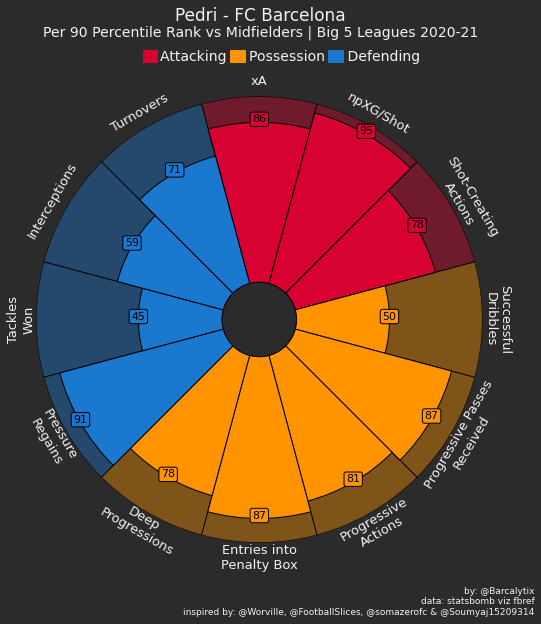

In [27]:
slice_colors = ["#D70232"] * 3 + ["#FF9300"] * 5 + ["#1A78CF"] * 4
text_colors = ["#000000"] * 12 

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#2b2b2b",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=13,
        va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.99, "Pedri - FC Barcelona", size=17,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.965,
    "Per 90 Percentile Rank vs Midfielders | Big 5 Leagues 2020-21",
    size=14,
    ha="center", color="#F2F2F2"
)

# add credits
CREDIT_1 = "by: @Barcalytix\ndata: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#F2F2F2",
    ha="right"
)

# add text
fig.text(
    0.34, 0.925, "Attacking     Possession     Defending", size=14,
    color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
  # these values might differ when you are plotting

plt.show()


ax.patch.set_facecolor('None')
fig.set_alpha = 0.0
fig.patch.set_visible(False)
fig.savefig(r'D:\Analytics\Football\Trials\Figures\PedriPizzaChart.png',dpi=300,bbox_inches='tight')
